# Exploratory Data Analysis (EDA)

The purpose of this notebook is to perform EDA on the cleaned data before modeling.

**Please note:** Because of the subject matter of this project, this notebook contains uncensored offensive language from the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB

In [2]:
# loading in clean_df
clean_df = pd.read_pickle('../pickle/clean_df.pkl')

In [3]:
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...


We already know that the vocabulary for this dataset is **20277 unique words.**

# Censoring Words

In [4]:
replacements = { 'bitch':'b**ch', 'bitches':'b**ches', 'nigga':'n***a', 'nigger':'ni**er', 'ass':'a**', 'hoe':'h**', 'hoes':'h**s', 'faggot':'fa***t', 'faggots':'fa***ts', 'fuck':'f**k','fucking':'f**king', 'pussy':'p**sy', 'fag':'f**', 'shit':'sh*t' }

for k, v in replacements.items():
    clean_df['clean_tweets'] = clean_df['clean_tweets'].str.replace(k, v)

In [5]:
# checking that worked
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat h*...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever f**k a b**ch and she sta to...


## Most Frequent Words for Each Classification

In [6]:
# creating new dfs for each classification
df_freq_hate = clean_df[clean_df['label']==1]
df_freq_not_hate = clean_df[clean_df['label']==0]

In [7]:
# pulling out the text data for cleaned tweets
data_hate = df_freq_hate['clean_tweets']
data_not_hate = df_freq_not_hate['clean_tweets']

In [8]:
# function to tokenize tweets and remove stop words with NLTK built-in library
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [9]:
# creating lists for processed hate & not hate data
process_hate = list(map(process_tweet, data_hate))
process_not_hate = list(map(process_tweet, data_not_hate))

In [10]:
# exact amount of hate speech
total_vocab_hate = set()
for comment in process_hate:
    total_vocab_hate.update(comment)
len(total_vocab_hate)

3384

In [11]:
# exact amount of not hate speech
total_vocab_NOT_hate = set()
for comment in process_not_hate:
    total_vocab_NOT_hate.update(comment)
len(total_vocab_NOT_hate)

19598

## Most Common Words in Each Category

In [12]:
flat_hate = [item for sublist in process_hate for item in sublist]
flat_not_hate = [item for sublist in process_not_hate for item in sublist]

In [13]:
hate_freq = FreqDist(flat_hate)
not_hate_freq = FreqDist(flat_not_hate)

In [14]:
# Top 20 Hate Speech words:
hate_freq.most_common(20)

[('b**ch', 209),
 ('fa***t', 186),
 ('like', 167),
 ('n***a', 138),
 ('a**', 138),
 ('white', 126),
 ('f**k', 121),
 ('trash', 112),
 ('ni**er', 110),
 ('u', 104),
 ('f**king', 95),
 ('dont', 94),
 ('im', 93),
 ('n***as', 76),
 ('f**', 74),
 ('get', 69),
 ('youre', 62),
 ('sh*t', 60),
 ('people', 58),
 ('hate', 57)]

In [15]:
not_hate_freq.most_common(20)

[('b**ch', 8018),
 ('b**ches', 3026),
 ('like', 2599),
 ('h**s', 2314),
 ('p**sy', 2050),
 ('im', 1968),
 ('h**', 1864),
 ('dont', 1655),
 ('got', 1540),
 ('a**', 1432),
 ('get', 1359),
 ('f**k', 1290),
 ('sh*t', 1202),
 ('u', 1176),
 ('aint', 1128),
 ('n***a', 1060),
 ('trash', 1030),
 ('lol', 1025),
 ('know', 769),
 ('n***as', 715)]

## Normalizing Word Frequencies

In [16]:
hate_total_word_count = sum(hate_freq.values())
hate_top_25 = hate_freq.most_common(25)
print("Hate Word \t Normalized Frequency")
print()
for word in hate_top_25:
    normalized_frequency = word[1]/hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Hate Word 	 Normalized Frequency

b**ch 		 0.01923
fa***t 		 0.01712
like 		 0.01537
n***a 		 0.0127
a** 		 0.0127
white 		 0.01159
f**k 		 0.01113
trash 		 0.01031
ni**er 		 0.01012
u 		 0.00957
f**king 		 0.008742
dont 		 0.00865
im 		 0.008558
n***as 		 0.006994
f** 		 0.00681
get 		 0.006349
youre 		 0.005705
sh*t 		 0.005521
people 		 0.005337
hate 		 0.005245
b**ches 		 0.005245
got 		 0.005245
ni**ers 		 0.004969
h**s 		 0.004969
fa***ts 		 0.004785


In [17]:
not_hate_total_word_count = sum(not_hate_freq.values())
not_hate_top_25 = not_hate_freq.most_common(25)
print("Not Hate Word \t Normalized Frequency")
print()
for word in not_hate_top_25:
    normalized_frequency = word[1]/not_hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Not Hate Word 	 Normalized Frequency

b**ch 		 0.04568
b**ches 		 0.01724
like 		 0.01481
h**s 		 0.01318
p**sy 		 0.01168
im 		 0.01121
h** 		 0.01062
dont 		 0.009429
got 		 0.008774
a** 		 0.008159
get 		 0.007743
f**k 		 0.00735
sh*t 		 0.006848
u 		 0.0067
aint 		 0.006427
n***a 		 0.006039
trash 		 0.005868
lol 		 0.00584
know 		 0.004381
n***as 		 0.004074
love 		 0.0038
one 		 0.003777
cant 		 0.003601
na 		 0.003544
yall 		 0.003475


### Visualizing Top Word Percentages

In [32]:
# create counts of hate and not hate with values and words
hate_bar_counts = [x[1] for x in hate_freq.most_common(20)]
hate_bar_words = [x[0] for x in hate_freq.most_common(20)]

not_hate_bar_counts = [x[1] for x in not_hate_freq.most_common(20)]
not_hate_bar_words = [x[0] for x in not_hate_freq.most_common(20)]

In [33]:
# set the color of the bar graphs
color = cm.magma(np.linspace(.4,.8, 30))

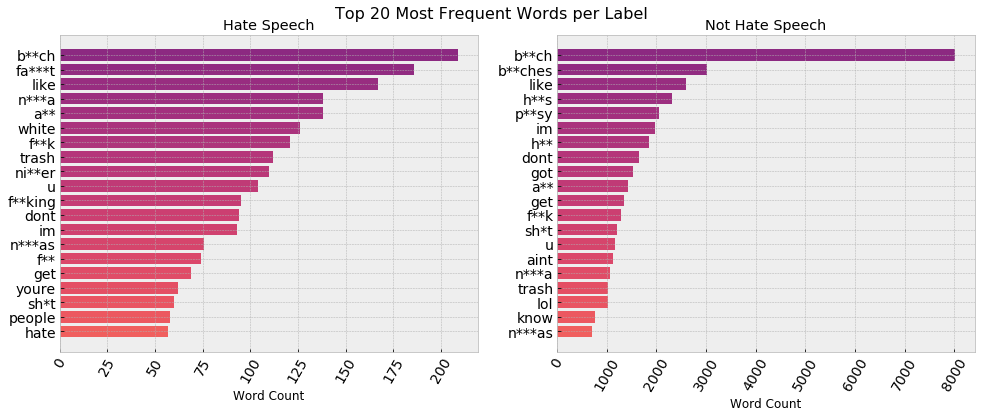

In [47]:
new_figure = plt.figure(figsize=(14,6))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(122)
ax2.invert_yaxis()

# generating a bar chart on each axes
ax.barh(hate_bar_words, hate_bar_counts, color=color)
ax2.barh(not_hate_bar_words, not_hate_bar_counts, color=color)

ax.title.set_text('Hate Speech')
ax2.title.set_text('Not Hate Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)

plt.savefig('../visualizations/label_word_count_y.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

Linguistically, it's important to note that the difference between hate speech and offensive lanugage often comes down to how it targets marginalized communities, often in threatening ways. 

For instance, we can notice from this figure that Hate Speech typically contains the N-word with the hard 'R'. The use of this slur indicates far more malicious intent, which goes beyond possibly using the word as slang.

Examples like that demonstratee the neuances of English slang and the fine line beteween Hate Speech and offensive language.

## Word Clouds

In [21]:
from wordcloud import WordCloud
hate_dict = dict(zip(hate_bar_words, hate_bar_counts))
not_hate_dict = dict(zip(not_hate_bar_words, not_hate_bar_counts))

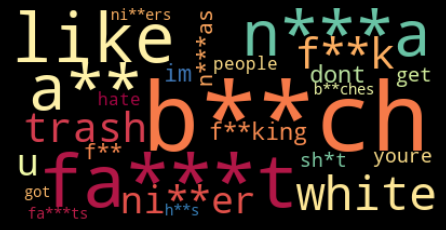

In [22]:
# create the word cloud:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(hate_dict)

# Display the generated image w/ matplotlib:
plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

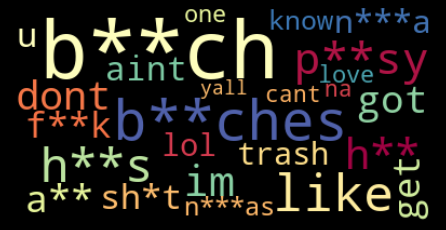

In [23]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_hate_dict)

plt.figure(figsize=(6,6), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')

plt.show()

These word clouds are pretty much unusable on public-facing documents, but they tell us that the top words for each label are very similar. It may be hard for the models to differentiate beteween what can be classified as hate speech or not.

## Tweet Cloud of Most Frequent Words in Corpus

In [24]:
tweet_df = clean_df[['clean_tweets', 'label']].copy()

In [25]:
tweet_df.to_csv('../preprocessing/corpus.txt', sep='\t')

In [26]:
import stylecloud
stylecloud.gen_stylecloud(file_path = '../preprocessing/corpus.txt', icon_name= 'fab fa-twitter', collocations=False, output_name = "../visualizations/icon_cloud.png")

![tweet_cloud](../visualizations/icon_cloud.png)

We can't really use this anywhere, but this was more just for fun :)

## CrowdFlow Votes EDA

The first 3 columns of the dataframe indicate how many votes went into decided each label. Each tweet's label was decided by majority-rules. Let's see if we can pull any useful information from these columns.

In [27]:
clean_df.head(3)

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat h*...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever f**k a b**ch and she sta to...


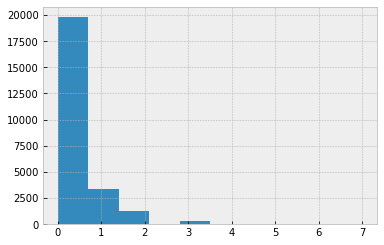

In [28]:
# distribution of vote counts for hate_speech_votes
clean_df.hate_speech_votes.hist()

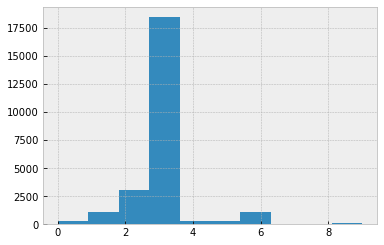

In [29]:
# distribution of vote counts for other_votes
clean_df.other_votes.hist()

### ^ intrepret these

maybe these can be conbiined into 1 graph?

### EDA on `total_votes` column

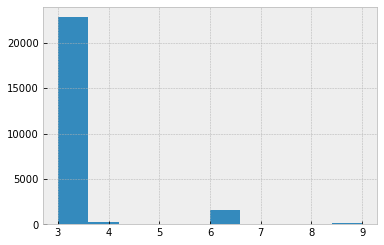

In [30]:
clean_df.total_votes.hist()